### This notebook can be used as a template for your coursework assignment. Below I show how to read, fit and plot a classification scheme.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Load the dataset
blood = pd.read_csv("/content/drive/MyDrive/PAM_ML_blood/Naive-Bayes-Classification-Data.csv")

In [ ]:
blood.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [ ]:
y_train = blood['diabetes']
X_train = blood.drop('diabetes',axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFfit = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
RFfit.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
def plot_decision_boundary(model, X, y, ax):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Get predictions
    ab = np.c_[xx.ravel(), yy.ravel()]
    pred = model.predict(ab)

    # Reshape predictions for contour plot
    cc = pred.reshape(xx.shape)

    ax.contourf(xx, yy, cc, cmap='inferno', alpha=0.2)
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='inferno', edgecolors='k')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Random Forest Decision Boundary')

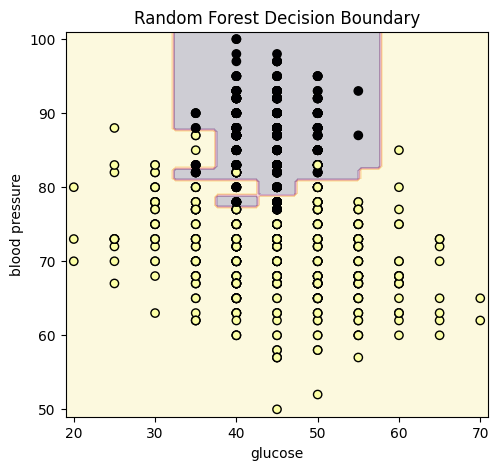

In [ ]:
plt.figure(figsize=(12, 5))

ax1 = plt.subplot(1, 2, 1)
plot_decision_boundary(RFfit, X_train, y_train, ax1)
# Set the labels for the axes
ax1.set_xlabel('glucose')  # Replace 'Feature 1' with the actual feature name
ax1.set_ylabel('blood pressure')  # Replace 'Feature 2' with the actual feature name

# Set a title for the plot if desired
ax1.set_title('Random Forest Decision Boundary')

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# Now with MLP
clf = MLPClassifier(random_state=1,hidden_layer_sizes=(50,50),activation='logistic', max_iter=300)
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 50), max_iter=300,
              random_state=1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'MLP Decision Boundary')

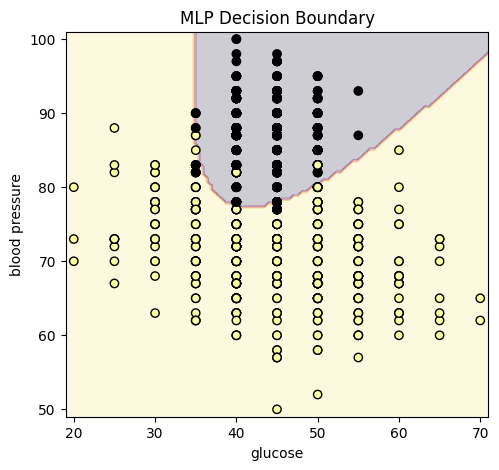

In [ ]:
plt.figure(figsize=(12, 5))

ax1 = plt.subplot(1, 2, 1)
plot_decision_boundary(clf, X_train, y_train, ax1)
# Set the labels for the axes
ax1.set_xlabel('glucose')  # Replace 'Feature 1' with the actual feature name
ax1.set_ylabel('blood pressure')  # Replace 'Feature 2' with the actual feature name

# Set a title for the plot if desired
ax1.set_title('MLP Decision Boundary')

In [ ]:
# How to predict a new data, but below you need to replace X_train by the new dataset
# Note they both need to have the same column names

y_pred = RFfit.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_train, y_pred)

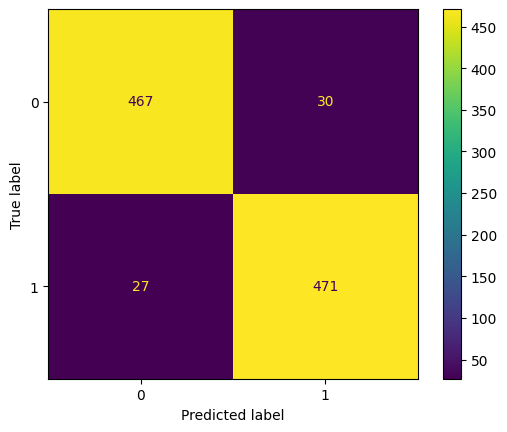

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_pred)